<a href="https://www.kaggle.com/code/vincentwainman/binary-classif-from-a-beginner-for-beginners?scriptVersionId=91321510" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

If you're relatively new to machine learning and have been overwhelmed by other entrees, this is a beginner's perspective for other beginners. My personal experience with ML is minimal. I've only taken a single university introductory level class, and I'm currently reading Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow for guidance. I'm still learning and fully expect errors, so please point them out! If you're looking for additional help on specific ML topics and concepts, I find https://machinelearningmastery.com/ very resourceful.

For this project, we have three files:
- gender_submission.csv: an example submission file containing the passengerId and Survived columns
- test.csv: contains 418 instances, which we'll consider our test set - a sample of the population data that we'll use to provide an unbiased evaluation of our final model fit
- train.csv: contains 891 instances, which we'll consider our train set - a sample of the population data that we'll use to train, tweak and evaluate our models until we single out the best one

Let's define the scope of work.

## Scope of Work

|Deliverable|Tasks                    |
|:----------:|:------------------------|
|1. Framing the problem|<ul><li>Define the objective</li><li>Define how to frame the objective under Machine Learning</li><li>Define how performance should be measured</li><li>Define the minimum performance needed to achieve the objective</li><li>List and verify all assumptions</li></ul>|
|2. Gathering the data|<ul><li>List the data needed and how much is required</li><li>Grab and convert the data so that it can be worked with</li><li>Check the size and type of data</li><li>Split the data into an appropriately proportioned training and test sets</li></ul>|
|3. Explore the data|<ul><li>Study each attribute and their characteristics</li><li>Visualize the data</li><li>Study the relationships between attributes</li></ul>|
|4. Prepare the data|<ul><li>Clean the data</li><li>Feature selection</li><li>Feature engineer</li><li>Feature scale</li></ul>|
|5. Select a model|<ul><li>Train many quick and dirty models from different categories using standard parameters</li><li>Analyze the type of errors the models make</li><li>Perform a quick round of feature selection and engineering</li><li>Perform and iterate on the last previous steps until...</li><li>You can shortlist the 3-5 most promising models</li></ul>|
|6. Fine-tune the system|<ul><li>Fine-tune the hyperparameters using cross-validation</li><li>Try ensemble methods</li><li>Narrow the final model and once you're confident about its performance, measure its performance on the test set to estimate the generalization error</li></ul>|
|7. Submit your solution|<ul>Apply and submit the model against unknown data</ul>|

# 1. Framing the Problem

- Define the objective
- Define how to frame the objective under Machine Learning
- Define how performance should be measured
- Define the minimum performance needed to achieve the objective
- List and verify all assumptions

## 1.1 Define the objective

On April 15, 1912, 1502 out of the 2224 people on board the Titanic perished after the ship collided with an iceberg. The challenge is to develop a predictive model that accurately classifies a set of unknown passengers' fate (dead or alive) based on several known factors. 

We already have data on a few hundred passengers, including their fate and relevant features like gender and age. These features typically include important patterns that are strongly related to a particular outcome. For instance, toddlers and women have a disproportionately high survival rate compared to adult men. Training a model that can pick up on the most relevant patterns will create a formula to classify a particular outcome based on several features. 

After we've trained and tweaked the perfect algorithm, we'll use our test set to measure how well our trained model can perform on unknown data. Without this process, we risk implementing a very biased model that can only produce accurate predictions on data it has already seen. 

## 1.2 Define how to frame it under Machine Learning

Let's establish where this problem would fit in the machine learning sphere by looking at a few facts:

- Our dataset is relatively small (~1000 records)
- We don't need to worry about future data - our machine learning solution will be one and done.
- We know what we're trying to predict, and we have the data on our label*
- Our target variable can only have a binary outcome: 0 - dead, 1 - alive

Therefore, this project falls under a supervised batch learning binary classification problem. 

*A label is the variable we are predicting. 

## 1.3 Define how performance should be measured

With binary classification, we have many options as far as performance metrics. However, we need to consider that our training dataset is somewhat imbalanced - 549 passengers died, while 342 survived. Ultimately, we want to prioritize high precision (little to no false positives, i.e., predicting passengers survived when they actually died) and high recall (little to no false negatives, i.e., predicting passengers died when they actually survived). Given my inexperience, we'll use a few univariate classification metrics to guide us:

- Confusion Matrix: true positives, true negatives, false positives and false negatives presented in a matrix. This compares the actual target values with those predicted by a classification model. This is an important baseline measurement that will easily visualize and summarize the performance of our classification algorithm. 
- Accuracy: measures how many observations, both positive and negative, were correctly classified.

$$ ACC = \dfrac{(tp+tn)}{(tp+fp+fn+tn)} $$
- F1 score: measures the harmonic mean between recall and precision. Since we place an equal level of importance on prioritizing a low level of false positives and true negatives, this score will optimize the recall/precision tradeoff.
$$ F_{1} = \dfrac{2}{\dfrac{1}{precision} + \dfrac{1}{recall}} = 2 * \dfrac{precision \times recall}{precision + recall} = \dfrac{TP}{TP + \dfrac{FN + FP}{2}} $$
- ROC AUC score: measures how good at ranking predictions our model is - the probability that a randomly chosen survival instance is ranked higher than a randomly chosen death instance. This is measured via the area under the receiver operating characteristic curve (plotting recall/true positive rate against false positive rate). 

Terminology notes:

> tp: number of true positives in our evaluation

> tn: number of false negatives in our evaluation

> fp: number of false positives in our evaluation

> recall $ = \dfrac{TP}{TP + FN} $

> precision $ = \dfrac{TP}{TP + FP}$

## 1.4 Define the minimum performance required to fulfill the objective

Since this project comes without any given performance guidelines, we will develop our own.

Setting ourselves up with some basic sanity checks, let's aim to do better than:
- Predicting outcomes based on coin flips (~50% deaths, ~50% survived)
- Predicting everyone dies (100% deaths, 0% survived)
- Predicting outcomes based on the single most relevant predictor

## 1.5 List and verify all assumptions

Assumptions:
- We've been given all the data we require and have no need to look for more
- Our training data is representative of new cases that we want to generalize to
- There is little to no inherent sampling biases
- There are no irrelevant features (i.e., PassengerId) that we can directly rule out without investigation 
- We can relate and draw meaning from other examples and real-world intuition/common-sense - this assumes that our data follows certain real-world conventions

Verification to follow in our implementation.

# 2. Gathering the Data

- List the data needed and how much is required
- Grab and convert the data so that it can be worked with
- Check the size and type of data
- Split the data into training and test sets

## 2.1 List the data needed and how much is required

Within the confines and rules of this project, we can only work with the data provided. Therefore, we'll stick with what we've been given and assume it's enough to fulfill our objective.

## 2.2 Grab and convert the data so that it can be worked with

We'll make sure to maintain a clean training set and use a copy for transformation and exploratory purposes.

In [1]:
import numpy as np              # linear algebra
import pandas as pd             # data processing
pd.set_option("max_rows", None) # display max rows
import matplotlib.pyplot as plt # visualizing graphs

WORKING_DIRECTORY = "/kaggle/input/titanic/" 
TRAIN_FILE_NAME = "train.csv"
TEST_FILE_NAME = "test.csv"

# train_df will be our "clean" unedited base dataset 
train_df = pd.read_csv(WORKING_DIRECTORY + TRAIN_FILE_NAME)
# test_df will avoid ANY use until the final model evaluation - we are not allowed to peek at it WHATSOEVER to prevent any bias from impacting our generalization error
test_df = pd.read_csv(WORKING_DIRECTORY + TEST_FILE_NAME)

## 2.3 Check the size and type of data

In [2]:
# let's take a glance at our dataset's structure
def examine_df_structure(trainXy: pd.DataFrame, testXy: pd.DataFrame):
    total_instances = trainXy.shape[0] + testXy.shape[0]
    print(f"We have {total_instances} rows in total")
    print(f"The training set has {trainXy.shape[0]} instances ({trainXy.shape[0]/total_instances * 100:.2f}% of the rows)")
    print(f"The test set has {testXy.shape[0]} instances ({testXy.shape[0]/total_instances * 100:.2f}% of the rows)")
    print(f"There are {trainXy.shape[1]} variables:\n")
    print(trainXy.dtypes)
    
examine_df_structure(train_df, test_df)

We have 1309 rows in total
The training set has 891 instances (68.07% of the rows)
The test set has 418 instances (31.93% of the rows)
There are 12 variables:

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [3]:
# let's separate our attributes into two categories: 
# - numerical attributes: quantitative in nature, defines a measurement (continuous) or count of something (discrete) (e.g., height)
# - categorical attributes: informs a characteristic (e.g., color) or ordinal representation (e.g., rank)
base_attribs = list(train_df)
num_attribs = ['Age', 'SibSp', 'Parch', 'Fare']
cat_attribs = ['Embarked', 'Cabin', 'Ticket', 'Sex', 'Name', 'Survived', 'Pclass', 'PassengerId']

# 3. Explore the data

- Study each attribute and their characteristics
- Visualize the data
- Study the relationships between attributes
- Identify promising unbiased transformations

## 3.1 Study each attribute and their characteristics

In [4]:
# let's take a quick look at a few instances
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# print the characteristics of each data column
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# calculate the number of unique values per feature
for feature in base_attribs:
    print(f"{feature} has {train_df[feature].nunique()} unique values")

PassengerId has 891 unique values
Survived has 2 unique values
Pclass has 3 unique values
Name has 891 unique values
Sex has 2 unique values
Age has 88 unique values
SibSp has 7 unique values
Parch has 7 unique values
Ticket has 681 unique values
Fare has 248 unique values
Cabin has 147 unique values
Embarked has 3 unique values


In [7]:
# calculate the value counts on categories
for category in cat_attribs:
    print(f"{train_df[category].value_counts().head(3)}\n")

S    644
C    168
Q     77
Name: Embarked, dtype: int64

B96 B98        4
G6             4
C23 C25 C27    4
Name: Cabin, dtype: int64

347082      7
CA. 2343    7
1601        7
Name: Ticket, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

Braund, Mr. Owen Harris             1
Boulos, Mr. Hanna                   1
Frolicher-Stehli, Mr. Maxmillian    1
Name: Name, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

1      1
599    1
588    1
Name: PassengerId, dtype: int64



In [8]:
# calculate the proportion of each item in the training set 
for category in ['Pclass','Survived','Sex','Embarked']:  # we'll ignore attributes with too many values and uniform spread
    print(train_df[category].value_counts(normalize=True).head(3), "\n")

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64 

0    0.616162
1    0.383838
Name: Survived, dtype: float64 

male      0.647587
female    0.352413
Name: Sex, dtype: float64 

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64 



In [9]:
# calculate the percentage of missing values per attribute
(train_df.isnull().sum() / train_df.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

In [10]:
# print summary statistics
train_df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [11]:
# find the average values of our numeric features for each target outcome
train_df.pivot_table(index='Survived', values=num_attribs)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [12]:
# find the median values of our numeric features for each target outcome
train_df.pivot_table(index='Survived', values=num_attribs, aggfunc='median')

,Age,Fare,Parch,SibSp
Survived,,,,
0,28.0,10.5,0,0
1,28.0,26.0,0,0


In [13]:
# find the count values of our categorical features for each target outcome
for category in ['Sex','Embarked','Pclass']:
    print(pd.crosstab(train_df['Survived'], train_df[category], margins=True, margins_name="Total"),"\n")

Sex       female  male  Total
Survived                     
0             81   468    549
1            233   109    342
Total        314   577    891 

Embarked    C   Q    S  Total
Survived                     
0          75  47  427    549
1          93  30  217    340
Total     168  77  644    889 

Pclass      1    2    3  Total
Survived                      
0          80   97  372    549
1         136   87  119    342
Total     216  184  491    891 



Key takeaways:
- A majority of females (233/314) survive, whereas most men (109/577) do not
- A majority of low-class individuals (372/491) do not survive 
- The majority of survivors paid more than their dead counterparts to come onboard

Referring to the metadata page found [here](https://www.kaggle.com/c/titanic/data), we already have a short definition of every column with a few notes.

Let's go over each attribute without jumping to insightful correlations or visualizations just yet.

<b>PassengerId</b>
- Type: unique unsigned integer
- Usefulness: It depends on whether there are any inherent patterns associated with PassengerId that would somehow impact survival. We'll assume PassengerId doesn't purely serve as an identifier until we prove otherwise.
- Distribution: uniform frequency

<b>Survived</b>
- Type: categorical integer, 2 possible values
- Usefulness: This is our target variable
- Distribution: ~61% died, ~39% survived

<b>Pclass</b>
- Type: integer, 3 possible values (1 = upper class, 2 = middle class, 3 = lower class)
- Usefulness: Social class will likely play a significant role in determining a passenger's fate since it's a substantial indicator of wealth, education, and power
- Distribution: upper class = ~24%, middle class = ~20%, lower class = ~55%

<b>Name</b>
- Type: unique text
- Usefulness: A person's name holds a lot of information, including social status, wealth, profession, titles, gender, marital status, etc. If patterns can be deciphered from name, it will likely play an essential role in our predictions
- Distribution: close to uniform frequency (accounting for the possibility of duplicate names)

<b>Sex</b>
- Type: text, 2 possible values
- Usefulness: A passenger's gender has a significant impact on their survival if social norms protect and prioritize the life of one gender over another
- Distribution: 65% male, 35% female

<b>Age</b>
- Type: continuous
- Usefulness: Passengers of different age groups will have notable distinctions in maturity, intellect, strength, and stamina. Successfully escaping the shipwreck will likely depend on these factors, especially for passengers that are on their own  
- Distribution: Peaks at 30 years old and skews down towards older individuals. There are very few young (0-15) passengers on board.
- Missing: 177 instances

<b>SibSp</b>
- Type: unsigned integer 
- Usefulness: The more a passenger has siblings and spouses aboard with them, the more it increases or decreases their odds of survival if they stick together
- Distribution: ~68% of passengers do not have a sibling or spouse aboard with them, ~23% have one, and the rest have between 2 and 8

<b>Parch</b>
- Type: unsigned integer 
- Usefulness: Like SibSp, the number of parents and children aboard subjugates specific individuals to additional influences that are likely to impact their fate
- Distribution: ~%76 of passengers have none, ~%13% have one

<b>Ticket</b>
- Type: text
- Usefulness: Much like PassengerId, if Ticket is not purely an identifier, it may contain data with insightful patterns towards specific outcomes. It may designate special privileges, schedules, deck locations, and other substantial factors
- Distribution: relatively uniform, except for the occasional duplicate (suggesting group purchases)

<b>Fare</b>
- Type: continuous
- Usefulness: A person's fare can hint at the level of accommodation and attention paid to their experience aboard the Titanic. A high-paying customer may have special access to certain areas that could increase or decrease their odds of survival.
- Distribution: most passengers pay between 0 and 100 for their fare.

<b>Cabin</b>
- Type: text
- Usefulness: May or may not be relevant, depending on how vital a passenger's cabin relates to their survival. Assuming that the lowest and most inner reaching cabins make it difficult to escape in an emergency, it may prove useful it can be decomposed to reflect that element
- Missing: 687

<b>Embarked</b>
- Type: text
- Usefulness: Depending on the context of embarkment and potentially the demographics/behavior/state of those boarding from each location, this feature may be helpful if specific embarkment locations point to sizable indicators of death or survival
- Distribution: 72% of passengers came aboard in Southampton, ~19% in Queenstown, and the rest in Cherbourg 
- Missing: 2

## 3.2 Visualize the data to form insights

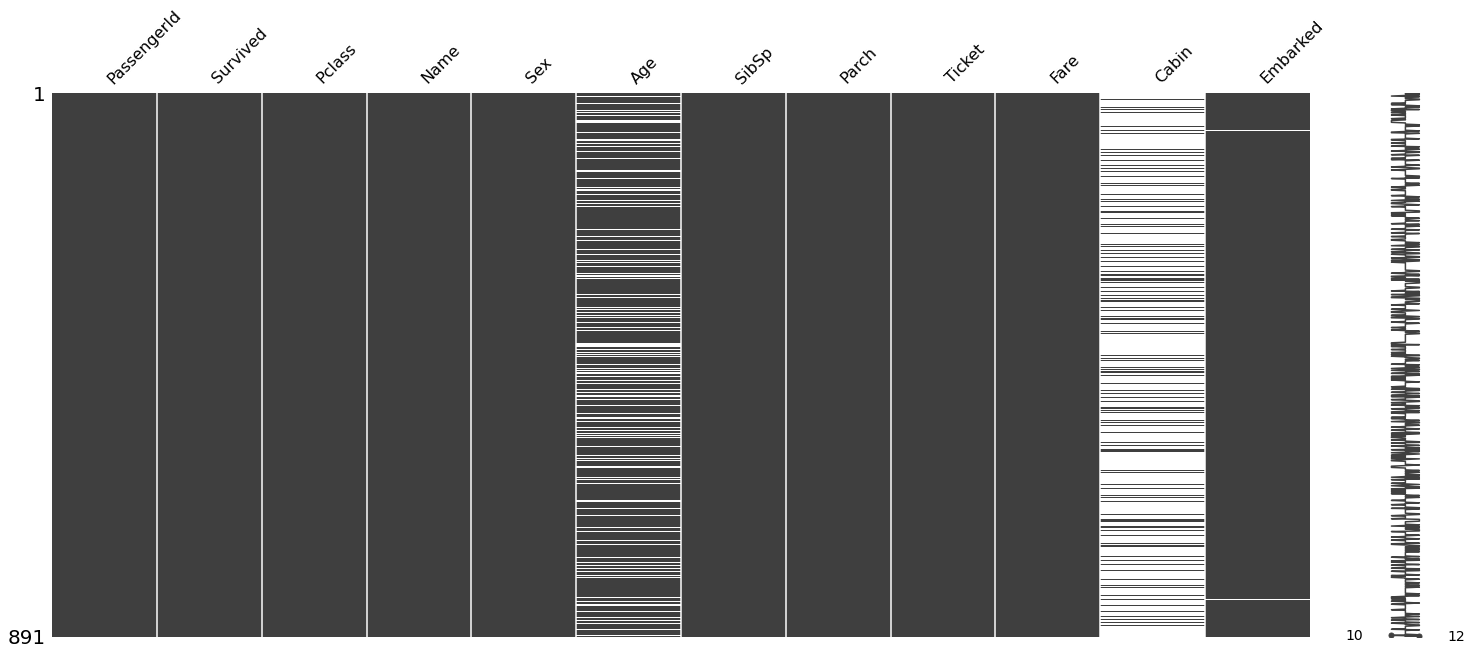

In [14]:
# examine missing data spread
import missingno as msno
%matplotlib inline
%config InlineBackend.figure_format = 'png'

msno.matrix(train_df)
plt.show()

There doesn't seem to be any unusual patterns to our missing values, but it's still neat to visualize.

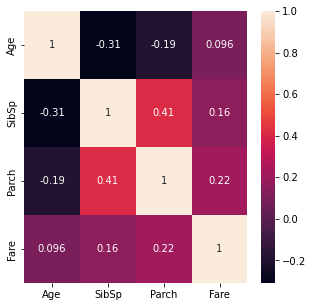

In [15]:
import seaborn as sns
# examine pearson's correlation between numerical variables

plt.figure(figsize=(5,5))
sns.heatmap(train_df[num_attribs].corr(),annot=True)
plt.show()

- Parch and SibSp are unusually correlated, so we'll keep that in mind to deal with it in the feature engineering phase to avoid multicollinearity
- All other numerical features seem to be relatively independent

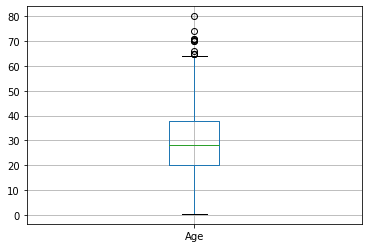

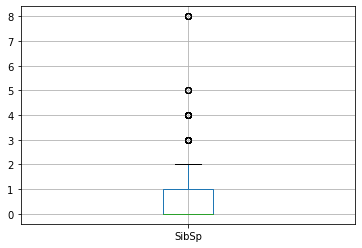

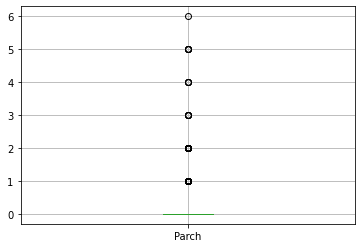

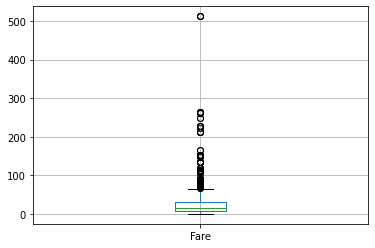

In [16]:
# look at the spread of each numerical attribute to look for any problematic outliers
for num_feature in num_attribs:
    train_df[[num_feature]].boxplot()
    plt.show()

- We may need to consider removing fare's biggest outlier
- All other numerical features seem healthy

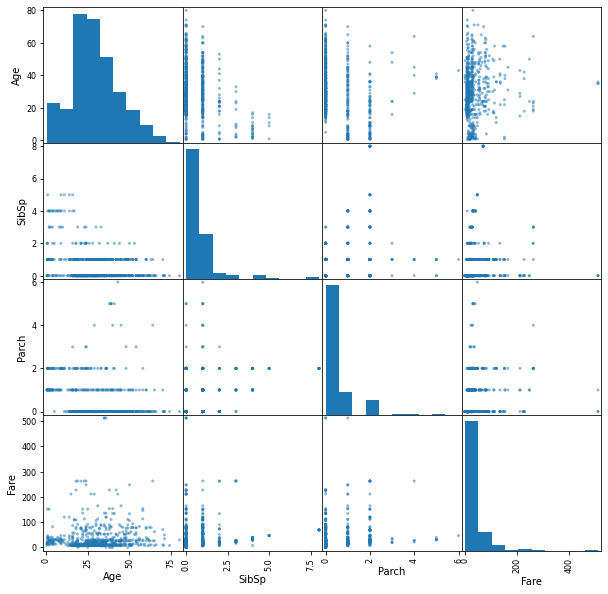

In [17]:
# look at the numerical feature-feature relationships
from pandas.plotting import scatter_matrix
plot = scatter_matrix(train_df[num_attribs], figsize=(10, 10))

Information about numerical distributions:
- The majority resemble log-normals, favoring a majority of occurences near 0
- Age is relatively absent of under age individuals, forming a skewed normal distribution

Information about numerical relationships:
- Age-Parch: Most passengers over 50 years old do not have one or more Parch, which makes sense since their parents are too old to be alive
- Age-SibSp: Most passengers over ~25 years old have three or less SibSp, which again makes sense since their siblings are likely of similar age and live independent lives
- Age-Fare: Most passengers pay 100 USD or less to come aboard, regardless of age.
- All other relationships do not have any significant patterns.

To consider the relationship between our features and our binary target value, we'll visualize how each attribute's distribution relates to the Survived column and see if we can garner any insights.

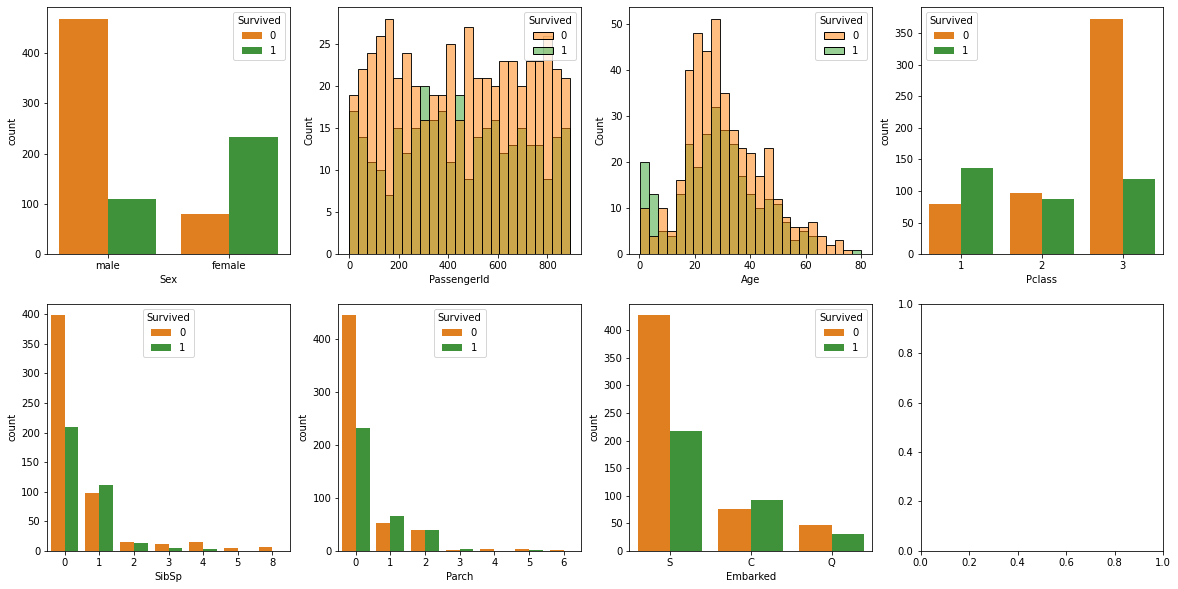

In [18]:
# visualizing feature-Survived relationships
fig, ax = plt.subplots(2,4, figsize = (20,10))
sns.countplot(x='Sex',hue='Survived',data=train_df, palette='Paired_r', ax=ax[0][0])
sns.histplot(x='PassengerId',hue='Survived',data=train_df, palette='Paired_r', bins=25, ax=ax[0][1])
sns.histplot(x='Age',hue='Survived', data=train_df, palette='Paired_r', bins=25, ax=ax[0][2])
sns.countplot(x='Pclass',hue='Survived',data=train_df,palette='Paired_r',ax=ax[0][3])
sns.countplot(x='SibSp',hue='Survived',data=train_df,palette='Paired_r',ax=ax[1][0])
sns.countplot(x='Parch',hue='Survived',data=train_df,palette='Paired_r',ax=ax[1][1])
sns.countplot(x='Embarked',hue='Survived',data=train_df,palette='Paired_r',ax=ax[1][2])

fig.show()

- PassengerId: There aren't any visible trends indicating that it's anything other than an identifier - so we'll assume it's no longer a potentially significant predictor
- Age: The majority of babies survive

We could dig much deeper into feature combinations. However, we'd like to avoid a full-blown analysis and stay on task with our objective. At this stage, we're only really interested in identifying harmful data quirks that require cleaning, interesting correlations between attributes, additional extractable information from our features, and distributions that could benefit from transformations. 

## 3.3 Study relationships between attributes

- We determined that our numerical features are relatively independent of each other. 
- Given that Survived is a categorical variable, we can perform the chi-square test between it and our other categorical variables to confirm if they're dependent. We do not want to include categorical variables that contribute very little to our predictive model. 

We'll apply the Chi-square Test between Survived and our other categorical variables, one at a time.

$ H_{0}: $The two categorical variables have no relationship$ $

$ H_{1}: $There exists a relationship$ $

In [19]:
import scipy.stats as stats
from scipy.stats import chisquare

for category in ["Pclass", "Sex", "Embarked"]:
    data_crosstab = pd.crosstab(train_df['Survived'],train_df[category])

    chi2_val, pval, dof, freqs = stats.chi2_contingency(data_crosstab)

    conclusion = "Failed to reject the null hypothesis. (There is no relationship)"
    if pval <= 0.05:
        conclusion = "Null Hypothesis is rejected. (There is a relationship)"
    
    print(f"Observing the relationship between Survival and {category}:")
    print(f"chi2 score = {chi2_val}")
    print(f"pvalue = {pval}")
    print(f"degrees of freedom = {dof}")
    print(conclusion,"\n")

Observing the relationship between Survival and Pclass:
chi2 score = 102.88898875696056
pvalue = 4.549251711298793e-23
degrees of freedom = 2
Null Hypothesis is rejected. (There is a relationship) 

Observing the relationship between Survival and Sex:
chi2 score = 260.71702016732104
pvalue = 1.1973570627755645e-58
degrees of freedom = 1
Null Hypothesis is rejected. (There is a relationship) 

Observing the relationship between Survival and Embarked:
chi2 score = 26.48914983923762
pvalue = 1.769922284120912e-06
degrees of freedom = 2
Null Hypothesis is rejected. (There is a relationship) 



From highest to lowest, Sex, Pclass, and Embarked all have significant relationships with Survived and should be used as predictors.

Taking a look at Name, Cabin and Ticket is a little more complex with a wide range of possible values. Still, we can measure their relationships with Survived once we apply transformations to extract any relevant patterns.

# 4. Prepare the data
- Clean the data
- Feature engineer
- Feature scale
- Feature selection

## 4.1 Clean the data

Cleaning the data involves:
Dealing with missing values.
Handling disruptive outliers.
Converting text/categorical attributes.
Any other processes required for ML algorithms to be compatible with our feature configuration.
Most machine learning models don't have a way to handle missing values and can't contextualize categorical inputs. 

### 4.1.1 Handling missing values

We've got a few ways to deal with missing values, but we ultimately want our actions to result in an optimized dataset. 

Depending on the context, we can:
- Remove the corresponding instances (delete the rows) - we resort to this when the instance is missing values in the majority of attributes
- Remove the entire attribute (delete the column) - usually used when a large portion of values are missing in a column, and existing values have little to no significant relevance
- Set the missing values to a common value (median, mean, most-frequent, etc.) - by far the most common approach. We apply this method when we have a good idea about the sample's distribution - i.e., we have enough values to determine the expected value of missing values.
- Extrapolate each missing value from other attributes or outside data. This method is a little extreme and used when concerned about our data being as accurate as possible. We'll attempt to derive value based on other attributes or sources

Let's look at how many missing values we have per set:

In [20]:
for df_str, df in zip(["Missing values in training set","Missing values in testing_set"],[train_df, test_df]):
    print(f"{df_str}:")
    missing_vals = df.isna().sum()
    print(missing_vals[missing_vals>0],"\n")

Missing values in training set:
Age         177
Cabin       687
Embarked      2
dtype: int64 

Missing values in testing_set:
Age       86
Fare       1
Cabin    327
dtype: int64 



Across both our datasets, we only need to deal with missing values in Age, Cabin, Embarked, and Fare.

In general, we will try to set the missing values to a typical value that makes sense under the attribute's distribution. It may not necessarily be accurate, but if we don't have too many missing values in a feature, it will likely not have a systemic impact on our model's performance.

- Cabin: Nearly 80% of these values are missing, and any imputation would likely introduce dirty data. We could drop this column and completely forget about it, but let's not dismiss its worth without first attempting to extract valuable information. We can start by filling in the gaps with a universal constant that bears no meaning to transform our feature to be usable.

- Embarked: With only two values missing, we can use the most frequent value and maintain the integrity of our data. 

- Age: 177 instances is a significant amount of missing rows, but it's not unrecoverable. Given that the age distribution is skewed, we'll work with imputing the median for now. Alternatively, we can attempt to get a near-accurate value of age based on a combination of other factors like pclass, parch, sibsp, etc. For instance, we could extract the average/median age from a passenger's pclass and predict the missing age from that.

- Fare: With only one value missing, we can use the median to represent the sample's expected value.

In [21]:
# before we apply any permanent changes to both datasets, let's start with an exploratory copy
explore = train_df.copy(deep=True)
explore['Cabin'].fillna(value='void', inplace=True)
explore['Embarked'].fillna(value=explore['Embarked'].mode()[0], inplace=True)
explore['Age'].fillna(value=explore['Age'].median(), inplace=True)

### 4.1.2 Handling text/categorical attributes

Let's convert our categorical attributes to be compatible with most ML models since they need to work with numerical data to derive patterns.

We will convert:
- Pclass
- Sex
- Embarked

> We won't include PassengerId, Name, Cabin, or Ticket to be part of that list since most of these attribute values are unique. However, we will see if we can extract anything from these particular attributes when entering our feature engineering phase.


In [22]:
# review of the limited number of values for each attribute
for cat in ['Pclass', 'Sex', 'Embarked']:
    print(f"{explore[cat].value_counts()}\n")

3    491
1    216
2    184
Name: Pclass, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

S    646
C    168
Q     77
Name: Embarked, dtype: int64



We'll apply [one-hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) for these particular transformations - essentially setting up a column for each possible value and imputing a 1 where that value popped up, and 0 for all other related attribute columns. So for example, an instance where sex is 'female', we'll have two new columns where \['female'] = 1 and \['male'] = 0 for that particular row.

In [23]:
from sklearn.preprocessing import OneHotEncoder

# apply one-hot encoding
cat_encoder = OneHotEncoder()
titanic_cat_1hot = cat_encoder.fit_transform(explore[['Pclass','Sex','Embarked']])
cat_encoder.categories_

[array([1, 2, 3]),
 array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object)]

## 4.2 Feature engineering
- Discretize continuous features
- Decompose features (categorical, date/time, etc.)
- Add promising transformations to features
- Aggregate features into promising new features

### 4.2.1 Discretize continuous features
We discretize our continuous features by transforming them to reflect intervals. The biggest reason to do this is to assign meaning to each segment by deriving patterns from these groupings. This transformation reduces the attribute's complexity and gives our learning algorithms a chance to better associate outcomes with intervals.

Our continuous features are Fare and Age, so let's transform both of these into bucket attributes. We want to be mindful to use a number of buckets large enough to maintain our distribution's shape and yet small enough to group similar values. For example, Age can have several buckets so that each interval reflects a different age group.

In [24]:
from sklearn.preprocessing import KBinsDiscretizer

# discretize our continuous variables
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
explore['Age_bins'] = kbins.fit_transform(explore[['Age']])
explore['Fare_bins'] = kbins.fit_transform(explore[['Fare']])

print(explore['Age_bins'].value_counts())
explore['Fare_bins'].value_counts()

3.0    346
2.0    177
4.0    118
5.0     70
0.0     54
1.0     46
6.0     45
7.0     24
8.0      9
9.0      2
Name: Age_bins, dtype: int64


0.0    732
1.0    106
2.0     31
4.0     11
5.0      6
9.0      3
3.0      2
Name: Fare_bins, dtype: int64

### 4.2.2 Decompose features

Our text features can be divided into pieces to extract patterns that lead to better generalizations. To make sense of this, consider an unrelated example:

- You're trying to predict whether a caller is or isn't a spammer
- One of the predictors (features) is a phone number. 
- Every phone number is unique, so your model will not be able to use it as a decent predictor. 
- However, we can decompose a phone number into its country code, area code, and the trailing seven digits if necessary. 
- That decomposition breaks down those patterns into different pieces, giving your model bite-sized insights. If a particular area code is notorious for spammers, then your model will be able to make that distinction. 

Let's see if any of our categorical features could benefit from decomposition.

In [25]:
explore[cat_attribs].head(5)

,Embarked,Cabin,Ticket,Sex,Name,Survived,Pclass,PassengerId
0,S,void,A/5 21171,male,"Braund, Mr. Owen Harris",0,3,1
1,C,C85,PC 17599,female,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,2
2,S,void,STON/O2. 3101282,female,"Heikkinen, Miss. Laina",1,3,3
3,S,C123,113803,female,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,4
4,S,void,373450,male,"Allen, Mr. William Henry",0,3,5


Ticket, Name, and Cabin are our only categorical variables that can be broken down, so let's work with those.

In [26]:
# viewing Cabin's values
explore['Cabin'].value_counts().head(10)

void           687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
D                3
F33              3
E101             3
F2               3
B20              2
Name: Cabin, dtype: int64

Let's make sense of the formatting:

- Every cabin has a leading letter and 1 to 3 trailing digits associated with it
- Some passengers have multiple cabins 

We can use intuition here to assume that levels and numbers separate cabins - but that remains to be seen and is entirely speculative at this point. We'll have to work with assumptions and come back and take another look if the decomposition method isn't fruitful (or discard the column entirely).

Let's zoom in on any instances with multiple cabins to learn what kind of values are possible and how to decompose this feature while minimizing any data loss.

In [27]:
# view instances where passengers have more than one cabin
mask = explore['Cabin'].str.strip().str.split(' ').str.len() # mask to acquire the number of cabins per passenger
explore.loc[(mask > 1), 'Cabin']

27         C23 C25 C27
75               F G73
88         C23 C25 C27
97             D10 D12
118            B58 B60
128              F E69
297            C22 C26
299            B58 B60
305            C22 C26
311    B57 B59 B63 B66
341        C23 C25 C27
390            B96 B98
435            B96 B98
438        C23 C25 C27
498            C22 C26
679        B51 B53 B55
699              F G63
700            C62 C64
715              F G73
742    B57 B59 B63 B66
763            B96 B98
789            B82 B84
802            B96 B98
872        B51 B53 B55
Name: Cabin, dtype: object

Based on these instances alone, we can infer/assume that most passengers with multiple cabins have cabins adjacent to each other. Additionally, there seems to be a cabin level 'F' with no numbers associated with it. Let's check those instances out.

In [28]:
# view instances where passengers have a cabin with a letter 'F'
explore.loc[explore['Cabin'].str.contains("F"), 'Cabin']

66       F33
75     F G73
128    F E69
148       F2
183       F4
193       F2
340       F2
345      F33
516      F33
618       F4
699    F G63
715    F G73
776      F38
Name: Cabin, dtype: object

Assuming our data is free of errors, it could indicate a multi-level cabin or a cabin nestled between two levels. Regardless, let's apply decomposition by grabbing the first cabin level and first cabin number. Since passengers with multiple cabins are installed adjacent to each other, we'll assume it is relatively inconsequential to use the first cabin over the others for our machine learning models. 

In [29]:
# apply decomposition to Cabin by creating Cabin_level and Cabin_number
explore['Cabin_level'] = explore['Cabin'].str.extract(r'^(.+?)\d') # extract everything before the first number, so we can catch multi-level cabins
explore['Cabin_number'] = explore['Cabin'].str.extract(r'(\d+)') # extract the first white space separated number
explore['Cabin_level'].fillna(value='none', inplace=True) # fill missing vals 
explore['Cabin_number'].fillna(value='none', inplace=True) # fill missing vals

explore[['Cabin','Cabin_level','Cabin_number']].head(5)

,Cabin,Cabin_level,Cabin_number
0,void,none,none
1,C85,C,85
2,void,none,none
3,C123,C,123
4,void,none,none


Let's explore Ticket next

In [30]:
# exploring Ticket's peculiarities
explore['Ticket'].value_counts().head(10)

347082          7
CA. 2343        7
1601            7
3101295         6
CA 2144         6
347088          6
S.O.C. 14879    5
382652          5
LINE            4
PC 17757        4
Name: Ticket, dtype: int64

Making sense of the ticket numbers and letters here is a bit trickier:
- Numbers are of varying magnitudes and seem to be generated randomly
- There are duplicate values - suggesting that tickets can be associated with groups of passengers 
- Some ticket numbers are preceded with a space-separated prefix, suggesting that some passengers have acquired additional privileges or are aboard under certain conditions. We can use this to pattern its impact as a predictor.
- Ticket prefixes have multiple values and are separated by slashes or dots
- Some tickets containing multiple prefixes instances have slashes or dots, and some do not
- Some tickets containing prefixes are lowercased, and some are uppercased

Decomposing the number part of the ticket is easy enough, but how do we break down the prefix? Let's see if these prefixes have any significant relationship with Survived before applying tweaks to any inconsistencies.

In [31]:
# decomposing Ticket into Ticket_prefix and Ticket_number
mask = explore['Ticket'].str.strip().str.split(' ').str.len() # mask is the number of space separated values
explore.loc[(mask >= 2), 'Ticket_special_prefix'] = explore['Ticket'].str.split().str.get(0) # we use the mask to extract the first space separated value
explore['Ticket_number'] = explore['Ticket'].str.extract(r'(\d+)(?!.*\d)') # extract the last number from ticket
explore['Ticket_special_prefix'].fillna(value='none', inplace=True)
explore['Ticket_number'].fillna(value='none', inplace=True)

explore[['Ticket','Ticket_special_prefix','Ticket_number']].head(10)

,Ticket,Ticket_special_prefix,Ticket_number
0,A/5 21171,A/5,21171
1,PC 17599,PC,17599
2,STON/O2. 3101282,STON/O2.,3101282
3,113803,none,113803
4,373450,none,373450
5,330877,none,330877
6,17463,none,17463
7,349909,none,349909
8,347742,none,347742
9,237736,none,237736


Finally, let's take a look at Name

In [32]:
# exploring Name's peculiarities
explore['Name'].value_counts().head(10)

Braund, Mr. Owen Harris                            1
Boulos, Mr. Hanna                                  1
Frolicher-Stehli, Mr. Maxmillian                   1
Gilinski, Mr. Eliezer                              1
Murdlin, Mr. Joseph                                1
Rintamaki, Mr. Matti                               1
Stephenson, Mrs. Walter Bertram (Martha Eustis)    1
Elsbury, Mr. William James                         1
Bourke, Miss. Mary                                 1
Chapman, Mr. John Henry                            1
Name: Name, dtype: int64

A passenger's name consists of quite a few parts:
- A prefix (Mr, Mrs., Miss, Master, Dr, Sergeant, etc.)
- A last name
- A first name
- An alternate name
- A nickname

As far as what's relevant in modeling, a name's prefix has the potential to pick up a lot of patterns that will help us generalize on new data. Last names could also technically be helpful if we consider groups of families sticking together. Let's decompose both prefix and last name and see how they fare in our evaluations.

In [33]:
# decompose Name to Name_prefix and Last_name, ignore the other parts for now
explore['Name_prefix'] = explore['Name'].str.extract(r', (.*?)\.') # grab the prefix by grabbing everything between ',' and '.'
explore['Last_name'] = explore['Name'].str.extract(r'^([\w]*)\,') # grab the last name by grabbing the characters before ','
explore['Name_prefix'].fillna(value='none', inplace=True)
explore['Last_name'].fillna(value='none', inplace=True)

explore[['Name','Name_prefix','Last_name']].head(10)

,Name,Name_prefix,Last_name
0,"Braund, Mr. Owen Harris",Mr,Braund
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,Cumings
2,"Heikkinen, Miss. Laina",Miss,Heikkinen
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,Futrelle
4,"Allen, Mr. William Henry",Mr,Allen
5,"Moran, Mr. James",Mr,Moran
6,"McCarthy, Mr. Timothy J",Mr,McCarthy
7,"Palsson, Master. Gosta Leonard",Master,Palsson
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs,Johnson
9,"Nasser, Mrs. Nicholas (Adele Achem)",Mrs,Nasser


### 4.2.3 Add promising transformations to features

We consider applying certain transformations to several features at this stage - a requirement to optimize the performance of many algorithms. A common transformation is applying feature scaling: a technique used to standardize our independent features in a fixed range to reduce the impact of highly varying values. Without it, many ML algorithms will place more importance on attributes with greater values, and our predictions will likely suffer because of it. However, it's not necessarily required - for instance, when your dataset has attributes with a small range of varying values. The best way to learn whether it's helpful or not is to apply it, measure the impact, and then try to understand why your model reacted the way it did. 

There are two general standardization methods: 
- Min-maxing (normalization): scaling everything between 0 and 1. By changing the values of numeric columns to use a standard scale WITHOUT distorting differences in ranges of values or losing information, we can smoothly combine the values as features during modeling and recognize their relative importance. It's useful when you don't know the distribution of your data or you know the distribution is NOT a bell curve. 
- Standardization: scaling a vector to its mean with a standard deviation of 1. It's useful when your data has varying scales, and your algorithm assumes your data has a bell curve.

Other transformations include:
- Converting non-numeric features into numeric - which we've already done earlier
- Tokenization (splitting text attributes) 
- Cleaning/treating decomposed and combined features for accuracy and consistency

Considering that we've just created several new attributes, we will check to see if they require any particular transformations to enhance their quality and relevance.

We'll consider applying feature scaling across the board after feature engineering is complete.

### 4.2.3.1 Examining and cleaning Name_prefix, Last_name, Ticket_special_prefix, Ticket_number, Cabin_level and Cabin_number

We want to pay special attention to enforcing consistency with our text attributes - is every name capitalized? are there multiple prefixes that can be grouped under one term? Are there any formatting issues? 

Let's dive in

In [34]:
# On closer examination of the name prefix, we have several inconsistencies and potential remedies
print(explore['Name_prefix'].value_counts())

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Name_prefix, dtype: int64


#### 1. Name prefix

On closer examination of the name prefix, we have several inconsistencies which may be problematic:
- The use of French and English prefixes for titles that have the same meaning (e.g., Mlle is Mademoiselle and is equivalent to Miss) 
- Different terms for people with honorific or noble titles (the Countess, Don, Jonkheer, Lady, Sir) based on different backgrounds
- Several different military or navy ranks

Let's enforce some consistency:

In [35]:
def apply_consistent_name_prefix(x):
    if x in ['Jonkheer', 'Don', 'Lady', 'Sir', 'the Countess']:
        return x.replace(x,'Honorific_title')
    elif x in ['Major', 'Capt', 'Col', 'Officer', 'Colonel', 'Sergeant', 'Captain', 'General', 'Private']:
        return x.replace(x,'Officer_title')
    elif x == 'Mme':
        return x.replace(x,'Mrs')
    elif x == 'Mlle':
        return x.replace(x,'Ms')
    elif x in ['M.','Mister']:
        return x.replace(x,'Mr')
    return x
    
explore['Name_prefix'] = explore['Name_prefix'].apply(apply_consistent_name_prefix)

explore['Name_prefix'].value_counts()

Mr                 517
Miss               182
Mrs                126
Master              40
Dr                   7
Rev                  6
Honorific_title      5
Officer_title        5
Ms                   3
Name: Name_prefix, dtype: int64

In [36]:
# looking at ticket prefixes
explore['Ticket_special_prefix'].value_counts()

none          665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
SOTON/OQ        7
A/5.            7
CA              6
STON/O2.        6
C               5
F.C.C.          5
S.O.C.          5
SC/PARIS        5
SC/Paris        4
S.O./P.P.       3
PP              3
A/4.            3
A/4             3
SC/AH           3
A./5.           2
SOTON/O2        2
A.5.            2
WE/P            2
S.C./PARIS      2
P/PP            2
F.C.            1
SC              1
S.W./PP         1
A/S             1
Fa              1
SCO/W           1
SW/PP           1
W/C             1
S.C./A.4.       1
S.O.P.          1
A4.             1
W.E.P.          1
SO/C            1
S.P.            1
C.A./SOTON      1
Name: Ticket_special_prefix, dtype: int64

#### 2. Ticket prefix

We can't say with certainty, but there does seem to be some indications of inconsistency with capitalizations and separation characters.

For instance:
- A.5. and A./5.
- SC/PARIS and SC/Paris.

Let's enforce some consistency by applying uniform rules.

In [37]:
def apply_consistent_ticket_prefix(x):
    if x == 'none': 
        return x
    return x.replace('.','').replace('/','').lower()

explore['Ticket_special_prefix'] = explore['Ticket_special_prefix'].apply(apply_consistent_ticket_prefix)

explore['Ticket_special_prefix'].value_counts()

none       665
pc          60
ca          41
a5          21
sotonoq     15
stono       12
scparis     11
wc          10
a4           7
soc          6
stono2       6
c            5
fcc          5
scah         3
pp           3
wep          3
sopp         3
sotono2      2
swpp         2
ppp          2
fc           1
as           1
fa           1
sc           1
scow         1
sca4         1
sop          1
sp           1
casoton      1
Name: Ticket_special_prefix, dtype: int64

That's a bit better, but we still have a few stragglers. It would be challenging to separate/group an individual prefix without knowing how they encoded Ticket in the first place, so let's not bother.

The rest of our decomposed attributes seem free of any issues.

### 4.2.4 Aggregate features into promising new features

By looking at our correlation matrix and observing how attributes generally relate to one another, we can create more informative (hopefully) features out of a few predictors. The idea is to come up with combinations that help us generalize better on new data. 

At first glance, SibSp (siblings/spouses) and Parch (parents/children) are very similar and could benefit from representing various aspects of that combined information:
- Family_size: summing the number of Siblings/spouses and Parents/children
- Accompanied: a binary value where 0 means the passenger has neither Sibsp nor Parch
- SibSp_only: a binary value where 0 means the passenger has Parch aboard, 1 means they do not AND have some SibSp
- Parch_only: a binary value where 0 means the passenger has SibSp aboard, 1 means they do not AND have some Parch
- Mixed_SibSp_Parch: a binary value where 0 means they only have one or no SibSp/Parch, 1 means they have some combination of Parch and SibSp 

In [38]:
# attribute combinations for SibSp and Parch
explore['Family_size'] = explore['SibSp'] + explore['Parch']
explore['Accompanied'] = explore['Family_size'].apply(lambda x: 1 if x > 0 else 0)
explore['SibSp_only'] = np.where((explore['SibSp'] > 0) & (explore['Parch'] == 0), 1, 0)
explore['Parch_only'] = np.where((explore['Parch'] > 0) & (explore['SibSp'] == 0), 1, 0)
explore['Mixed_SibSp_Parch'] = np.where((explore['Parch'] > 0) & (explore['SibSp'] > 0), 1, 0)

## 4.3 Feature selection

Feature selection is the process of reducing the number of features when developing a predictive model. The idea is to discard any non-informative inputs that do not contribute to a performant model. At this stage, we can make a note of which attributes will definitely not contribute to a performant model as they exist right now. These are usually attributes of instances that are consistently unique where patterns can't emerge, or attributes you know for sure have no relationship with your target variable. Let's consider which features to drop:

- Name: We've decomposed name to extract the relevant data inside each instance, so this attribute can now be dropped
- Ticket: We've done the same thing with ticket

We'll see how all the other attributes contribute to our models before considering their removal.

## 4.4 Feature scaling

Now that we've finalized feature engineering, let's apply uniform scaling

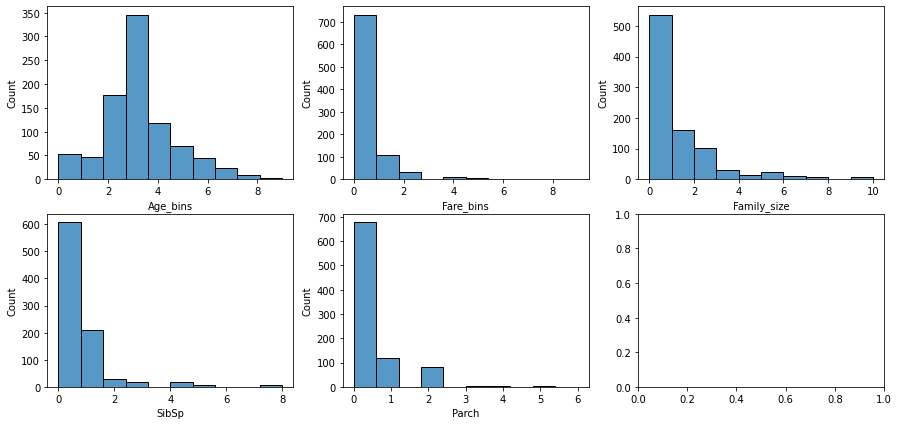

In [39]:
# let's see what our numerical attribute distributions/scaling looks like
fig, ax = plt.subplots(2,3, figsize = (15,7))
sns.histplot(x='Age_bins',data=explore, bins=10, ax=ax[0][0])
sns.histplot(x='Fare_bins',data=explore, bins=10, ax=ax[0][1])
sns.histplot(x='Family_size',data=explore, bins=10, ax=ax[0][2])
sns.histplot(x='SibSp', data=explore, bins=10, ax=ax[1][0])
sns.histplot(x='Parch', data=explore, bins=10, ax=ax[1][1])

fig.show()

In [40]:
explore[['SibSp', 'Parch', 'Family_size', 'Fare_bins', 'Age_bins']].head(5)

,SibSp,Parch,Family_size,Fare_bins,Age_bins
0,1,0,1,0.0,2.0
1,1,0,1,1.0,4.0
2,0,0,0,0.0,3.0
3,1,0,1,1.0,4.0
4,0,0,0,0.0,4.0


In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
explore[['SibSp', 'Parch', 'Family_size', 'Fare_bins', 'Age_bins']] = scaler.fit_transform(explore[['SibSp', 'Parch', 'Family_size', 'Fare_bins', 'Age_bins']])

explore[['SibSp', 'Parch', 'Family_size', 'Fare_bins', 'Age_bins']].head(5)

,SibSp,Parch,Family_size,Fare_bins,Age_bins
0,0.125,0.0,0.1,0.000000,0.222222
1,0.125,0.0,0.1,0.111111,0.444444
2,0.000,0.0,0.0,0.000000,0.333333
3,0.125,0.0,0.1,0.111111,0.444444
4,0.000,0.0,0.0,0.000000,0.444444


## Data preparation - summarized/automated by pipelines and column transformers

To summarize our data preprocessing steps, we
1. Cleaned data
2. Encoded categorical features
3. Binned continuous features
4. Decomposed certain features
5. Transformed/created (combined) features
6. Feature scaled
7. Feature selected

However, we did not apply the required transformations to our test set - which should go through a similar process with careful attention to not cause any data leakage (revealing information from the test set in some way). 

Let's go through the same process we've been working on using Sklearn tools. Sklearns' tools will better tweak our processes with automation.

In [42]:
# grabbing the libraries we need
from sklearn import set_config
set_config(display="diagram")                            # displays pipeline
from sklearn.impute import SimpleImputer                 # imputation transformer to deal with missing values
from sklearn.compose import ColumnTransformer            # applies transformers to columns
from sklearn.pipeline import Pipeline                    # applies a pipeline of transforms with a final estimator
from sklearn.preprocessing import StandardScaler         # standardizes attributes 
from sklearn.preprocessing import MinMaxScaler           # normalizes attributes
from sklearn.preprocessing import OneHotEncoder          # encode categorical features as one-hot arrays
from sklearn.feature_selection import chi2, f_classif    # feature evaluators
from sklearn.base import BaseEstimator, TransformerMixin # base classes for estimators and mixin class for transformers
from sklearn.model_selection import cross_val_score      # to evaluate our models via k cross fold scoring
from sklearn.metrics import accuracy_score
# classification models
from sklearn.naive_bayes import MultinomialNB            
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import NeighborhoodComponentsAnalysis, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from xgboost.sklearn import XGBClassifier

# metrics
from sklearn.metrics import classification_report

import re # regex

# coppying our training set without our dependent value
trainX = train_df.drop('Survived', axis=1)

In [43]:
# let's create our own custom transformers for decomposition and feature combination

class Decompose(BaseEstimator, TransformerMixin):

    def __init__(self, feature_name, include = 'all'): 
        self.feature_name = feature_name
        self.include = include
    
    def fit(self, X, y=None):
        return self 
    
    def decompose_cabins(self) -> tuple:
        cabin_level = self.df['Cabin'].str.extract(r'^(.+?)\d')      # extract everything before the first number, so we can catch multi-level cabins
        cabin_number = self.df['Cabin'].str.extract(r'(\d+)')        # extract the first white space separated number
        cabin_level.fillna(value='none', inplace=True)               # fill missing vals 
        cabin_number.fillna(value='none', inplace=True)              # fill missing vals
        return cabin_level.to_numpy(), cabin_number.to_numpy()
    
    def decompose_tickets(self) -> tuple:
        mask = self.df['Ticket'].str.strip().str.split(' ').str.len()                                # mask is the number of space separated values
        self.df.loc[(mask >= 2), 'Ticket_special_prefix'] = self.df['Ticket'].str.split().str.get(0) # we use the mask to extract the first space separated value
        ticket_number = self.df['Ticket'].str.extract(r'(\d+)(?!.*\d)')                              # extract the last number from ticket
        self.df['Ticket_special_prefix'].fillna(value='none', inplace=True)                          # fill missing vals
        ticket_number.fillna(value='none', inplace=True)                                             # fill missing vals
        self.df['Ticket_special_prefix'] = self.df['Ticket_special_prefix'].apply(apply_consistent_ticket_prefix)
        return ticket_number.to_numpy(), self.df['Ticket_special_prefix'].to_numpy()
    
    def decompose_names(self) -> tuple:
        self.df['Name_prefix'] = self.df['Name'].str.extract(r',(.*?)\.') # grab the prefix by grabbing everything between ',' and '.'
        last_name = self.df['Name'].str.extract(r'^([\w]*)\,') # grab the last name by grabbing the characters before ','
        self.df['Name_prefix'].fillna(value='none', inplace=True)         # fill missing vals
        last_name.fillna(value='none', inplace=True)           # fill missing vals
        self.df['Name_prefix'] = self.df['Name_prefix'].apply(apply_consistent_name_prefix)
        return self.df['Name_prefix'].to_numpy(), last_name.to_numpy()
    
    def decompose_feature(self):
        if self.feature_name == 'Cabin':
            return self.decompose_cabins()
        elif self.feature_name == 'Ticket':
            return self.decompose_tickets()
        elif self.feature_name == 'Name':
            return self.decompose_names()
        else:
            raise ValueError(f'incorrect feature name ({self.feature_name}) in decomposition, it can only be Name, Cabin or Ticket')
    
    def transform(self, X: np.array):
        self.df = pd.DataFrame(X, columns = [self.feature_name])
        new_feature1, new_feature2 = self.decompose_feature()
        if self.include == 'all': # keeping the original column along with its decompositions
            return np.c_[X, new_feature1, new_feature2]
        elif self.include == 'one':
            return np.c_[new_feature1]
        elif self.include == 'two':
            return np.c_[new_feature2]
        elif self.include == 'both':
            return np.c_[new_feature1, new_feature2]
        else:
            raise ValueError(f"Incorrect parameter for include = {self.include} for feature = {self.feature_name}")

class CombineSibSpParch(BaseEstimator, TransformerMixin):

    def __init__(self, attr_combinations: str = 'all'): 
        self.attr_combinations = attr_combinations
    
    def fit(self, X: np.array, y=None):
        return self 

    def combine_SipSp_Parch(self, X: np.array):
        df = pd.DataFrame(X, columns=['SibSp','Parch'])
        df['Family_size'] = df['SibSp'] + df['Parch'] + 1
        df['Accompanied'] = df['Family_size'].apply(lambda x: 1 if x > 0 else 0)
        SibSp_only = np.where((df['SibSp'] > 0) & (df['Parch'] == 0), 1, 0)
        Parch_only = np.where((df['Parch'] > 0) & (df['SibSp'] == 0), 1, 0)
        mixed_SibSp_Parch = np.where((df['Parch'] > 0) & (df['SibSp'] > 0), 1, 0)
        return df['Family_size'].to_numpy(), df['Accompanied'].to_numpy(), SibSp_only, Parch_only, mixed_SibSp_Parch 
        
    def transform(self, X: np.array):
        a, b, c, d, e = self.combine_SipSp_Parch(X) # get family_size, accompanied, sibsp_only, parch_only, and mixed_sibsp_parch
        if self.attr_combinations == 'all':
            return np.c_[X, a, b, c, d, e]
        elif self.attr_combinations == 'booleans_only':
            return np.c_[b, c, d, e]
        elif self.attr_combinations == 'family_size_only':
            return np.c_[a]
        elif self.attr_combinations == 'combined_attributes_only':
            return np.c_[a, b, c, d, e]
        elif self.attr_combinations == 'family_size_and_og':
            return np.c_[X, a]
        elif self.attr_combinations == 'booleans_and_og':
            return np.c_[X, b, c, d, e]
        else:
            raise ValueError(f"Incorrect parameter for attr_combinations = {self.attr_combinations}, it can only be all, booleans_only, family_size_only or combined_attributes_only")

In [44]:
# now we can develop our pipeline and column transformers

# features to pass in our pipelines for transformation
num_features = ['Age', 'Fare', 'SibSp', 'Parch']                        
cat_features = ['Cabin', 'Sex', 'Pclass', 'Name', 'Ticket', 'Embarked'] 

# let's keep track of the indices for each column name
num_np_i = {key:index for (index,key) in enumerate(num_features)}
cat_np_i = {key:index for (index,key) in enumerate(cat_features)}
# merge dicts
np_i = {**num_np_i, **cat_np_i} 

def get_indices(col_names: str):
    # check col_names for typos
    for name in col_names:
        if name not in np_i.keys():
            raise ValueError(f"{name} does not exist - possible names are: {np_i.keys()}")
    return [index for key, index in np_i.items() if key in col_names]

categorical_imputers = ColumnTransformer(
    transformers = [
        ('cabin_imputer', SimpleImputer(strategy='constant', fill_value='missing'), get_indices(['Cabin'])),
        ('others_imputer', SimpleImputer(strategy='most_frequent'), get_indices(['Sex','Pclass','Name','Ticket','Embarked']))
    ],remainder='passthrough')

num_feature_transformations = ColumnTransformer(
    transformers = [
        ('binner', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform'), get_indices(["Age","Fare"])),    
        ('combine_sibsp_parch', CombineSibSpParch(), get_indices(["SibSp","Parch"]))
    ],remainder='passthrough')

decomposition_attr_adders = ColumnTransformer(
    transformers = [
        ('decomp_name', Decompose(feature_name='Name', include='both'), get_indices(["Name"])),
        ('decomp_ticket', Decompose(feature_name='Ticket', include='both'), get_indices(["Ticket"])),
        ('decomp_cabin', Decompose(feature_name='Cabin', include='both'), get_indices(["Cabin"]))
    ],remainder='passthrough')

num_transformer = Pipeline(
    steps = [
    ('num_imputer', SimpleImputer(strategy='median')),
    ('convert_nums', num_feature_transformations),
    ('scale', MinMaxScaler())
])

cat_transformer = Pipeline(
    steps = [
    ('cat_imputers', categorical_imputers),
    ('decomp', decomposition_attr_adders),
    ('encode', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers = [
    ('num_transf', num_transformer, num_features), # keep list as-is, np column indexes count on it
    ('cat_transf', cat_transformer, cat_features), # keep list as-is, np column indexes count on it
], remainder='drop') # dropping passengerId

preprocessor

ColumnTransformer(transformers=[('num_transf',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('convert_nums',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('binner',
                                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                                    n_bins=10,
                                                                                                    strategy='uniform'),
                                                                                   [0,
                                                                                    1]),
                                                                                  ('combine_sibsp_parch',
                                                                                   CombineSibSpParch(),
                                                                                   [2,
                                                                                    3])])),
                                                 ('scale', MinMaxScaler())]),
                                 ['Age'...
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('decomp_name',
                                                                                   Decompose(feature_name='Name',
                                                                                             include='both'),
                                                                                   [3]),
                                                                                  ('decomp_ticket',
                                                                                   Decompose(feature_name='Ticket',
                                                                                             include='both'),
                                                                                   [4]),
                                                                                  ('decomp_cabin',
                                                                                   Decompose(feature_name='Cabin',
                                                                                             include='both'),
                                                                                   [0])])),
                                                 ('encode',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Cabin', 'Sex', 'Pclass', 'Name', 'Ticket',
                                  'Embarked'])])

The above graph represents the actions of our preprocessing phase.

We divide our tasks into two different pipelines: one for categorical features and one for numerical features.
- Numerical features (SibSp, Parch, Fare, Age) are subject to these transformations:

1. Each numeric column gets treated for missing values by replacing them with their medians
2. A column transformer is called to bin Fare and Age
3. Our custom CombinedFeatures gets called, creating FamilySize, Accompanied, SibSp_only, Parch_only, and Mixed_SbSp_Parch_only
4. A scaler is applied to all numerical features

- Categorical features (Pclass, Sex, Embarked, Name, Cabin, Ticket) are subjected to these transformations:
1. Categorical imputations fall under a column transformer, whereby cabin instances are treated with a constant, and all other categories are treated by replacing missing values with the most frequent item in their column
2. Our custom Decompose gets called, decomposing Name, Ticket, and Cabin into Name_prefix, Last_name, Ticket_prefix, Ticket_number, Cabin_level, and Cabin_number
3. One hot encoding is applied to all our categorical features

# 5. Select a model

- Train many quick and dirty models from different categories using standard parameters
- Analyze the type of errors the models make
- Perform a quick round of feature selection and engineering
- Perform and iterate on the last previous steps until you can shortlist the 3-5 most promising models

## 5.1 Train many quick and dirty models from different categories using standard parameters

Because of the no free lunch theorem, there's no way to know which model will best perform for our particular situation. We'll see how things go with a variety of models suitable for binary classification:

- Naive Bayes
- Random Forest Classifier
- Logistic Regression
- Support Vector Machines
- Gradient Boosted Decision Trees
- and perhaps VotingClassifier (to be applied at a later time)

To better understand how each classifier works, I encourage you to know how they work on paper to understand their strengths and limitations. Don't worry about the complexity of ensemble models for now. I would suggest statquest on youtube as an excellent place to start if you lack the fundamentals of applied statistics.

Using cross-validation, let's use our standard parameters and get a sense of the average performance. Cross-validation is an essential tool to evaluate how your model is likely to perform while minimizing any overfitting. Look into the bias-variance tradeoff if you want to understand why this could happen.

In [45]:
def display_scores(scores, model_name):
    print(f"Model: {model_name}")
    print(f"Accuracy score: {scores.mean():.2f} +/- {scores.std():.2f}")

# setup our models, we use 42 as the random seed here, but it can be an arbitrary number. This will give us consistent results that we can rely on each run-through.
naive_bayes = MultinomialNB()
random_forest = RandomForestClassifier(random_state=42)
SVM = svm.LinearSVC(random_state=42)
log_reg = LogisticRegression(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

base_param_scores = {}

classification_models = [(naive_bayes, "Naive Bayes"), 
                         (random_forest, "Random Forest Classifier"),
                         (SVM, "Support Vector Machine"), 
                         (log_reg, "Logistic Regression"),
                         (xgb, "Gradient Boosted Decision Trees")]

# let's see how they compare using a score based on accuracy
for model, model_str in classification_models:
    
    binary_classif = Pipeline(
        steps = [
            ('preprocessor', preprocessor),
            ('model', model)
    ])
    
    base_param_scores[model_str] = cross_val_score(binary_classif, trainX, train_df['Survived'], cv=10, scoring="accuracy")
    display_scores(base_param_scores[model_str], model_str)

Model: Naive Bayes
Accuracy score: 0.80 +/- 0.05
Model: Random Forest Classifier
Accuracy score: 0.83 +/- 0.04
Model: Support Vector Machine
Accuracy score: 0.85 +/- 0.03
Model: Logistic Regression
Accuracy score: 0.84 +/- 0.03
Model: Gradient Boosted Decision Trees
Accuracy score: 0.82 +/- 0.04


These accuracy scores are not too shabby without any hyperparameter tweaking! But how does it compare against our baseline comparison models?

Let's see how it fares against a model that applies head or tails (50/50) and a model that predicts death on every instance.

In [46]:
from sklearn.base import BaseEstimator

class HeadsOrTails(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.random.binomial(n=1, p=0.5, size=len(X)) 
    
class AlwaysDead(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X),), dtype=bool)
    
heads_tails_clf = HeadsOrTails()
always_dead_clf = AlwaysDead()

scores = cross_val_score(heads_tails_clf, trainX, train_df['Survived'], cv=10, scoring="accuracy")
display_scores(scores, "Heads or Tails")
scores = cross_val_score(always_dead_clf, trainX, train_df['Survived'], cv=10, scoring="accuracy")
display_scores(scores, "Always dead")

Model: Heads or Tails
Accuracy score: 0.48 +/- 0.09
Model: Always dead
Accuracy score: 0.62 +/- 0.07


This serves as our sanity check, confirming that we've developed models that will perform better than any basic prediction algorithm.

## 5.2 Analyze the type of errors a model makes

To do this, we'll consider our evaluation metrics we outlined earlier:

- Confusion matrix
- F1 score
- Accuracy
- ROC AUC

We've already got a sense of accuracy, let's see how they each do on these other metrics.

### 5.2.1 Confusion matrix

This is a matrix that outlines the number of true-negatives, false-positives, false-negatives and true-positives in a quadrant of this shape:

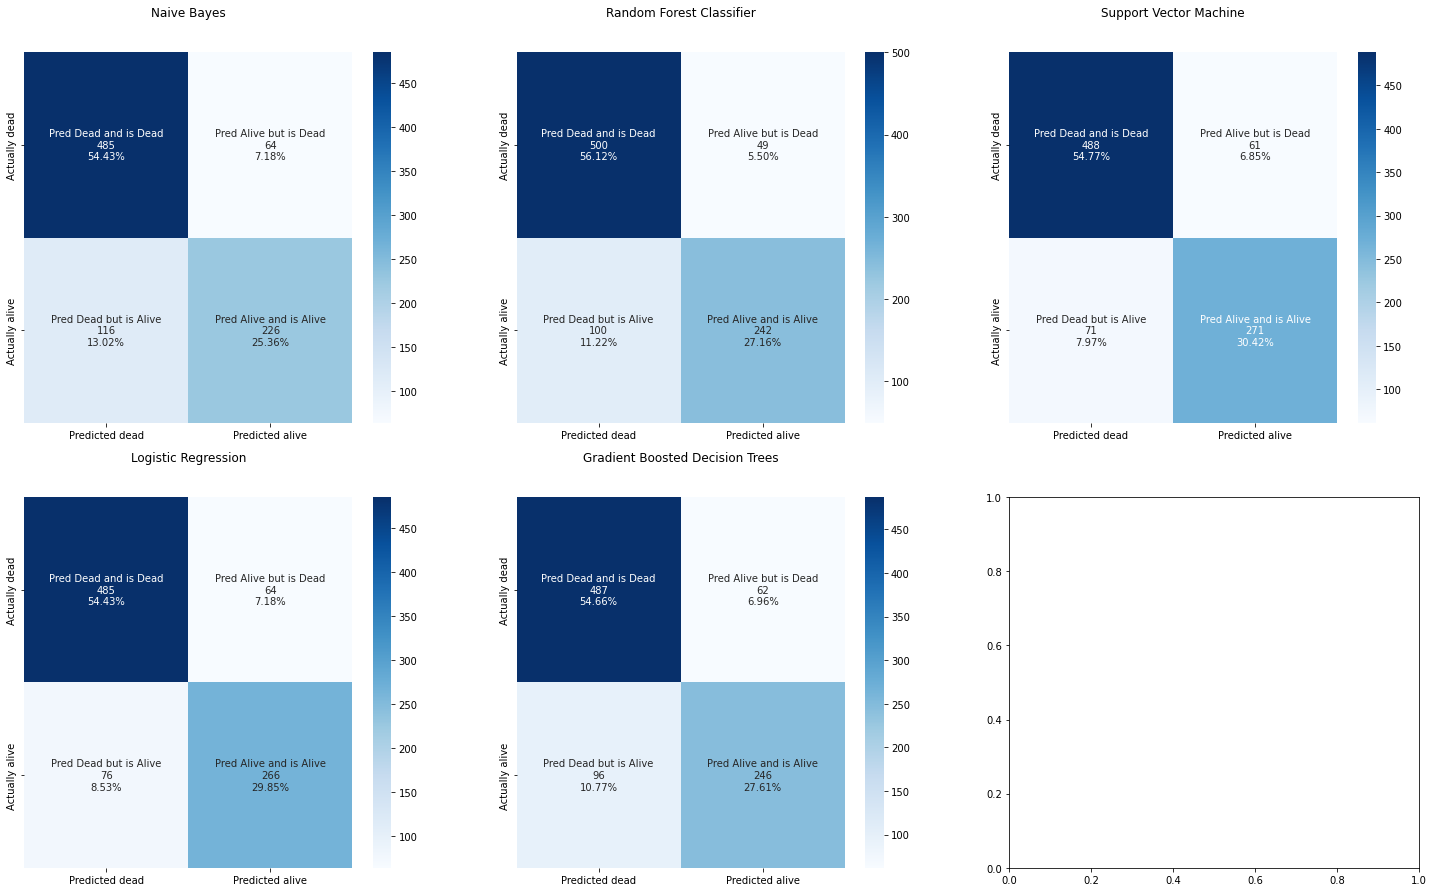

In [47]:
# visualization code by Vikram Aruchamy: https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

group_names = ['Pred Dead and is Dead','Pred Alive but is Dead','Pred Dead but is Alive','Pred Alive and is Alive']
trainY_pred_saved = {}
x_figures, y_figures = 3, 2
fig, ax = plt.subplots(y_figures,x_figures, figsize=(25,15))

figure_x_i, figure_y_i = 0, 0

for model, model_str in classification_models:

    binary_classif = Pipeline(
        steps = [
            ('preprocessor', preprocessor),
            ('model', model)
    ])
    
    trainY_pred = cross_val_predict(binary_classif, trainX, train_df['Survived'], cv=10)
    trainY_pred_saved[model_str] = trainY_pred
    cf_matrix = confusion_matrix(train_df['Survived'], trainY_pred)
    
    group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)
    
    matrix = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax = ax[figure_y_i][figure_x_i])
    if figure_x_i == x_figures - 1:
        figure_x_i = 0
        figure_y_i += 1
    else:
        figure_x_i += 1

    matrix.set_title(f'{model_str}\n\n')
    matrix.xaxis.set_ticklabels(['Predicted dead','Predicted alive'])
    matrix.yaxis.set_ticklabels(['Actually dead','Actually alive'])

fig.show()

Based on the above confusion matrices, we can see that:
- Naive Bayes favors false negative predictions - more often than not, predicts people are dead when they're alive. This results in a low amount of false positives - predicting someone is alive when they're dead
- Support Vector Machine has the fewest number of incorrect predictions, making it the most accurate model
- Random Forest Classifier and Logistic Regression come in close second, with very similar outcomes

To better rank our models side by side, we can apply an...

### 5.2.2 F1 score 

Which carefully considers recall (proportion of true positives out of combined true positives and false negatives) and precision (proportion of true positives out of combined true positives and false positives)

In [48]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score

i = 0
for model, model_str in classification_models:
    
    print(f"Model: {model_str}\nF1: {f1_score(train_df['Survived'], trainY_pred_saved[model_str]):.4f}")
    print(f"Precision = {precision_score(train_df['Survived'], trainY_pred_saved[model_str]):.2f}")
    print(f"Recall = {recall_score(train_df['Survived'], trainY_pred_saved[model_str]):.2f}\n")
    i += 1

Model: Naive Bayes
F1: 0.7152
Precision = 0.78
Recall = 0.66

Model: Random Forest Classifier
F1: 0.7646
Precision = 0.83
Recall = 0.71

Model: Support Vector Machine
F1: 0.8042
Precision = 0.82
Recall = 0.79

Model: Logistic Regression
F1: 0.7917
Precision = 0.81
Recall = 0.78

Model: Gradient Boosted Decision Trees
F1: 0.7569
Precision = 0.80
Recall = 0.72



This reinforces what the confusion matrices were displaying - SVM is the superior model. 
- Logistic regression has a much stronger recall than random forest
- Naive bayyes may have the strongest precision, but it's at the high cost of a low recall

Let's look at ROC AUC next

### 5.2.3 ROC AUC

The area under the curve of ROC tells us how much a model is capable of distinguishing between classes. The higher the AUC, the better the model is at predicting true negatives and true positives. In other words, the better it is at distinguishing between someone who died and who survived.

In [49]:
from sklearn.metrics import roc_auc_score

i = 0
for model, model_str in classification_models:
    print(f"Model: {model_str}\nROC AUC = {roc_auc_score(train_df['Survived'], trainY_pred_saved[model_str])}\n")
    i += 1

Model: Naive Bayes
ROC AUC = 0.7721215607324322

Model: Random Forest Classifier
ROC AUC = 0.8091745757837217

Model: Support Vector Machine
ROC AUC = 0.840643274853801

Model: Logistic Regression
ROC AUC = 0.8306010928961748

Model: Gradient Boosted Decision Trees
ROC AUC = 0.8031828204390759



Logistic regression and SVM seem very close in the most telling metric. At this point, we can confirm that naive bayes will not make the shortlist and confidently discard it.

### 5.3 Perform a quick round of feature selection and engineering

We can attempt to boost performance by experimenting with feature selection and discarding any non-informative attributes. We then revisit feature engineering to exploit/fix anything that we missed in our initial round of feature engineering. 

When playing around with feature selection, you'll note that in the majority of models, the inclusion of the decompositions of Name, Ticket, Cabin, and the combination of attributes SibSp and Parch has a positive effect on model performance.

We'll move on to the next step, including feature selection in our hyper-parameter tuning process.

### 5.4 Perform and iterate on the last previous steps until you can shortlist the 3-5 most promising models

So far, 3 out of 5 models have had very similar exceptional results, so we'll shortlist our options to random forest, SVM, and logistic regression. 

## 6. Fine-tune the system
- Fine-tune the hyperparameters using cross-validation
- Try ensemble methods
- Narrow the final model, and once you're confident about its performance, measure its performance on the test set to estimate the generalization error

### 6.1 Fine-tune the hyperparameters using cross-validation 

Manual hyperparameter tuning is highly tedious. Let's use Sklearn's RandomizedSearchCV to find the best parameter values for us. It experiments with the explicit hyperparameters we declare and utilizes cross-validation to accurately evaluate their relative impact.

Let's first look at each model's possible parameters and then our preprocessor's parameters.

In [50]:
import copy
from sklearn.feature_selection import SelectPercentile, chi2

# creating individual pipes for each classifier
log_reg_clf = Pipeline(
        steps = [
            ('preprocessor', preprocessor),
            ('feature_sel', SelectPercentile(score_func=chi2, percentile = 90)),
            ('log_reg', log_reg)
        ])

SVM_clf = Pipeline(
        steps = [
            ('preprocessor', preprocessor),
            ('feature_sel', SelectPercentile(score_func=chi2, percentile = 90)),
            ('svm', SVM)
        ])

random_forest_clf = Pipeline(
        steps = [
            ('preprocessor', preprocessor),
            ('feature_sel', SelectPercentile(score_func=chi2, percentile = 90)),
            ('rand_forest', random_forest)
        ])

# printing out model parameters
for model in [log_reg, SVM, random_forest]:
    print(model.get_params().keys(),"\n")

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start']) 

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'multi_class', 'penalty', 'random_state', 'tol', 'verbose']) 

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']) 



Now we can set our model parameters:

In [51]:
# hyper parameter tunings for our models
log_reg_dist = {'log_reg__C': [10, 100, 1000],    # penalty strength
                'log_reg__penalty': ['l2'],       # penalty type
                'log_reg__solver': ['lbfgs'],         
                'log_reg__max_iter': [1000]}
SVM_dist = {'svm__C': [10, 100, 1000],            
            'svm__penalty': ['l2'],
            'svm__dual':[True],
            'svm__max_iter': [1000]}
random_forest_dist = {'rand_forest__bootstrap': [True, False], # method for sampling data points repeatedly with replacement to estimate (data point can reappear in future drawn samples)
                      'rand_forest__max_depth': [1, 10, 100, 1000], # max depth of tree
                      'rand_forest__max_features': ['auto', 'sqrt', 'log2'], # number of features considered when looking for the best split
                      'rand_forest__min_samples_leaf': [1, 10, 1000], # min samples required to be at a leaf node
                      'rand_forest__min_samples_split': [2, 100, 1000], # min # of samples required to split an internal node
                      'rand_forest__n_estimators': [10, 100, 1000] # number of decision trees in our forest
}

Hyperparameter tuning also applies to decisions made in our preprocessor and feature selector:

In [52]:
num_transformer_dist = {'preprocessor__num_transf__convert_nums__combine_sibsp_parch__attr_combinations': ['all', 'family_size_only', 
                                                                                                           'booleans_only', 'combined_attributes_only']}
cat_transformer_dist = {'preprocessor__cat_transf__decomp__decomp_ticket__include': ['both', 'one', 'two', 'all'],
                        'preprocessor__cat_transf__decomp__decomp_cabin__include': ['both', 'one', 'two', 'all'],
                        'preprocessor__cat_transf__decomp__decomp_name__include': ['both', 'one', 'two', 'all']}
feature_selection_dist = {'feature_sel__percentile': [95, 100],         # percentage of top features to keep
                          'feature_sel__score_func': [chi2]}            # feature importance function

And now we can tune our models:

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

base_param_distribs = {**num_transformer_dist, **cat_transformer_dist, **feature_selection_dist}

param_distribs = {**num_transformer_dist, **cat_transformer_dist, **feature_selection_dist, **log_reg_dist}

# log_search = GridSearchCV(log_reg_clf, param_distribs, cv=10, scoring='roc_auc')

# log_search = RandomizedSearchCV(log_reg_clf, 
#                    param_distributions=base_param_distribs,
#                    cv=10, 
#                    n_iter=100,
#                    random_state=42,
#                    scoring='roc_auc')

# after tuning via the above methods, we can retrieve the best parameters by using log_search.best_params_
best_log_params = {'feature_sel__percentile': 100,
 'feature_sel__score_func': chi2,
 'log_reg__C': 10,
 'log_reg__max_iter': 1000,
 'log_reg__penalty': 'l2',
 'log_reg__solver': 'lbfgs',
 'preprocessor__cat_transf__decomp__decomp_cabin__include': 'all',
 'preprocessor__cat_transf__decomp__decomp_name__include': 'one',
 'preprocessor__cat_transf__decomp__decomp_ticket__include': 'all',
 'preprocessor__num_transf__convert_nums__combine_sibsp_parch__attr_combinations': 'family_size_only'}

log_reg_clf.set_params(**best_log_params)

log_reg_clf.fit(trainX, train_df['Survived'])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transf',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('convert_nums',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('binner',
                                                                                                    KBinsDiscretizer(encode='ordinal',
                                                                                                                     n_bins=10,
                                                                                                                     strategy='uniform'),
                                                                                                    [0,
                                                                                                     1]),
                                                                                                   ('combine_sibsp_parch',
                                                                                                    CombineSibSpParch(attr_combinat...
                                                                                                    Decompose(feature_name='Ticket'),
                                                                                                    [4]),
                                                                                                   ('decomp_cabin',
                                                                                                    Decompose(feature_name='Cabin'),
                                                                                                    [0])])),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Cabin', 'Sex', 'Pclass',
                                                   'Name', 'Ticket',
                                                   'Embarked'])])),
                ('feature_sel',
                 SelectPercentile(percentile=100,
                                  score_func=<function chi2 at 0x7fa9345ec0e0>)),
                ('log_reg',
                 LogisticRegression(C=10, max_iter=1000, random_state=42))])

Let's make a few quick notes about logistic regression's best parameters:
- It excludes last names, and the original name column, suggesting that only title/prefix is useful
- It excludes SibSp and Parch, suggesting that maybe they had multicollinearity issues and the combined feature family_size was the way to get around that

In [54]:
# log_search.best_params_

In [55]:
def display_metrics(predicted_y, actual_y):
    print(f"ROC AUC = {roc_auc_score(actual_y, predicted_y)}")
    print(f"F1: {f1_score(actual_y, predicted_y):.4f}")
    print(f"Precision = {precision_score(actual_y, predicted_y):.2f}")
    print(f"Recall = {recall_score(actual_y, predicted_y):.2f}")

# default estimator stats
display_scores(base_param_scores['Logistic Regression'],'Logistic Regression')
display_metrics(trainY_pred_saved['Logistic Regression'], train_df['Survived'])

print("\n")

# best estimator stats
display_scores(cross_val_score(log_reg_clf, trainX, train_df['Survived'], cv=10, scoring="accuracy"),'Updated Logistic Regression')
trainY_pred = cross_val_predict(log_reg_clf, trainX, train_df['Survived'], cv=10)
display_metrics(trainY_pred, train_df['Survived'])

Model: Logistic Regression
Accuracy score: 0.84 +/- 0.03
ROC AUC = 0.8306010928961748
F1: 0.7917
Precision = 0.81
Recall = 0.78


Model: Updated Logistic Regression
Accuracy score: 0.85 +/- 0.03
ROC AUC = 0.839732528041415
F1: 0.8030
Precision = 0.81
Recall = 0.79


We've gotten a slight improvement in logistic regression, let's try it with SVM:

In [56]:
param_distribs = {**num_transformer_dist, **cat_transformer_dist, **feature_selection_dist, **SVM_dist}

best_SVM_params = {'feature_sel__percentile': 100,
 'feature_sel__score_func': chi2,
 'preprocessor__cat_transf__decomp__decomp_cabin__include': 'all',
 'preprocessor__cat_transf__decomp__decomp_name__include': 'all',
 'preprocessor__cat_transf__decomp__decomp_ticket__include': 'all',
 'preprocessor__num_transf__convert_nums__combine_sibsp_parch__attr_combinations': 'family_size_only',
 'svm__C': 10,
 'svm__dual': True,
 'svm__max_iter': 1000,
 'svm__penalty': 'l2'}

# SVM_search = GridSearchCV(SVM_clf, param_distribs, cv=10, scoring='roc_auc')

# SVM_search = RandomizedSearchCV(SVM_clf, 
#                    param_distributions=base_param_distribs,
#                    n_iter=100, 
#                    cv=10, 
#                    random_state=42,
#                    scoring='roc_auc')

SVM_clf.set_params(**best_SVM_params)

SVM_clf.fit(trainX, train_df['Survived'])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transf',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('convert_nums',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('binner',
                                                                                                    KBinsDiscretizer(encode='ordinal',
                                                                                                                     n_bins=10,
                                                                                                                     strategy='uniform'),
                                                                                                    [0,
                                                                                                     1]),
                                                                                                   ('combine_sibsp_parch',
                                                                                                    CombineSibSpParch(attr_combinat...
                                                                                                   ('decomp_ticket',
                                                                                                    Decompose(feature_name='Ticket'),
                                                                                                    [4]),
                                                                                                   ('decomp_cabin',
                                                                                                    Decompose(feature_name='Cabin'),
                                                                                                    [0])])),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Cabin', 'Sex', 'Pclass',
                                                   'Name', 'Ticket',
                                                   'Embarked'])])),
                ('feature_sel',
                 SelectPercentile(percentile=100,
                                  score_func=<function chi2 at 0x7fa9345ec0e0>)),
                ('svm', LinearSVC(C=10, random_state=42))])

A few quick notes regarding SVM's best parameters:
- It thrives on as many features as possible, utilizing every feature input except for SibSp and Parch and the related boolean variables - again suggesting that they had multicollinearity issues

In [57]:
# SVM_search.best_params_

In [58]:
# default estimator stats
display_scores(base_param_scores['Support Vector Machine'],'Support Vector Machine')
display_metrics(trainY_pred_saved['Support Vector Machine'], train_df['Survived'])
    
print("\n")
    
# best estimator stats
display_scores(cross_val_score(SVM_clf, trainX, train_df['Survived'], cv=10, scoring="accuracy"),'Updated Support Vector Machine')
trainY_pred = cross_val_predict(SVM_clf, trainX, train_df['Survived'], cv=10)
display_metrics(trainY_pred, train_df['Survived'])

Model: Support Vector Machine
Accuracy score: 0.85 +/- 0.03
ROC AUC = 0.840643274853801
F1: 0.8042
Precision = 0.82
Recall = 0.79


Model: Updated Support Vector Machine
Accuracy score: 0.86 +/- 0.04
ROC AUC = 0.846107755728118
F1: 0.8114
Precision = 0.83
Recall = 0.79


SVM also benefits from a slight uptick in performance, moving on to random forest:

In [59]:
param_distribs = {**num_transformer_dist, **cat_transformer_dist, **feature_selection_dist, **random_forest_dist}

best_rand_forest_params = {'rand_forest__n_estimators': 1000,
 'rand_forest__min_samples_split': 2,
 'rand_forest__min_samples_leaf': 1,
 'rand_forest__max_features': 'log2',
 'rand_forest__max_depth': 40,
 'rand_forest__bootstrap': False,
 'preprocessor__num_transf__convert_nums__combine_sibsp_parch__attr_combinations': 'family_size_only',
 'preprocessor__cat_transf__decomp__decomp_ticket__include': 'all',
 'preprocessor__cat_transf__decomp__decomp_name__include': 'one',
 'preprocessor__cat_transf__decomp__decomp_cabin__include': 'two',
 'feature_sel__score_func': chi2,
 'feature_sel__percentile': 100}


# rand_forest_search = GridSearchCV(random_forest_clf, param_distribs, cv=10, scoring='roc_auc')

# rand_forest_search = RandomizedSearchCV(random_forest_clf, 
#                    param_distributions=base_param_distribs,
#                    n_iter=100,
#                    cv=10, 
#                    random_state=42,
#                    scoring='roc_auc')

random_forest_clf.set_params(**best_rand_forest_params)

random_forest_clf.fit(trainX, train_df['Survived'])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transf',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('convert_nums',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('binner',
                                                                                                    KBinsDiscretizer(encode='ordinal',
                                                                                                                     n_bins=10,
                                                                                                                     strategy='uniform'),
                                                                                                    [0,
                                                                                                     1]),
                                                                                                   ('combine_sibsp_parch',
                                                                                                    CombineSibSpParch(attr_combinat...
                                                                                                              include='two'),
                                                                                                    [0])])),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Cabin', 'Sex', 'Pclass',
                                                   'Name', 'Ticket',
                                                   'Embarked'])])),
                ('feature_sel',
                 SelectPercentile(percentile=100,
                                  score_func=<function chi2 at 0x7fa9345ec0e0>)),
                ('rand_forest',
                 RandomForestClassifier(bootstrap=False, max_depth=40,
                                        max_features='log2', n_estimators=1000,
                                        random_state=42))])

In [60]:
# rand_forest_search.best_params_

In [61]:
# default estimator stats
display_scores(base_param_scores['Random Forest Classifier'],'Random Forest Classifier')
display_metrics(trainY_pred_saved['Random Forest Classifier'], train_df['Survived'])
    
print("\n")
    
# best estimator stats
display_scores(cross_val_score(random_forest_clf, trainX, train_df['Survived'], cv=10, scoring="accuracy"),'Updated Random Forest Classifier')
trainY_pred = cross_val_predict(random_forest_clf, trainX, train_df['Survived'], cv=10)
display_metrics(trainY_pred, train_df['Survived'])

Model: Random Forest Classifier
Accuracy score: 0.83 +/- 0.04
ROC AUC = 0.8091745757837217
F1: 0.7646
Precision = 0.83
Recall = 0.71


Model: Updated Random Forest Classifier
Accuracy score: 0.84 +/- 0.04
ROC AUC = 0.8149985619787172
F1: 0.7724
Precision = 0.85
Recall = 0.70


Random forest does increase in precision at the expense of recall, but it's still better than the default parameters overall.

At this point, we can try tuning our hyperparameters some more and performing an exhaustive search for the best one, but we shouldn't expect a dramatic increase in performance.

### 6.2 Try ensemble methods

Since these models seem to be pretty equivalent, they may balance each other's weaknesses with VotingClassifier considering each model's strength by applying majority voting based on predictive probability - thereby enforcing the most robust model's viewpoint on each particular prediction.

In [62]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('random forest', random_forest_clf), 
                                          ('svm', SVM_clf),
                                          ('logistic_regression', log_reg_clf)], voting='hard')


display_scores(cross_val_score(voting_clf, trainX, train_df['Survived'], cv=10, scoring="accuracy"),'Voting Classifier')
trainY_pred = cross_val_predict(voting_clf, trainX, train_df['Survived'], cv=10)
display_metrics(trainY_pred, train_df['Survived'])

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Model: Voting Classifier
Accuracy score: 0.85 +/- 0.03


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

ROC AUC = 0.8349630907870771
F1: 0.7976
Precision = 0.82
Recall = 0.77


A lack of convergence occurs when the difference between the errors per iteration is greater than some predetermined tolerance level. It's indicative of a model that does not reach its optimized solution, which could be due to several reasons, like the number of iterations. Without going into it too much, it's not necessarily a problem.

### 6.3 Narrow the final model and once you're confident about its performance, measure its performance on the test set to estimate the generalization error

Unfortunately, this ensemble model performs more poorly than SVM's hypertuned model, so we'll narrow it down to SVM.

# 7. Submit your solution by applying it against unknown data

In [63]:
SVM_clf.set_params(**best_SVM_params)
SVM_clf.fit(trainX, train_df['Survived'])

# predict what the Survived values are in our test set
SVM_predictions = SVM_clf.predict(test_df)

# submit our predictions for evaluations
output = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': SVM_predictions})
output.to_csv('submission.csv', index=False)

# and we get a score of around ~78% accuracy using this model to predict test set outcomes

This was a fun project. Machine learning is a daunting rabbit hole that can sometimes feel a little complicated - don't give up; everyone starts somewhere.

Note that getting around ~80% accuracy on your test set is the best you can do without cheating. Submissions with scores of ~90% or above are almost definitively cheating.

It is rarely realistic to get a model that produces 100% accurate predictions in a supervised learning problem, so don't worry about your leaderboard score! You can usually improve something in the machine learning process, but seeking perfect predictive models isn't it.

Good luck on your machine learning journey!